### This file contains implementations of Random Forest classifier and Decision Tree classifier on IRIS dataset

# Random Forest on Iris DataSet

In [1]:
# Load the library with the iris dataset
from __future__ import division
from sklearn.datasets import load_iris
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import numpy as np
import graphviz # for decision tree visualization

# Load Iris DataSet provided by Scikit-learn

In [2]:
iris_dataset = load_iris()

## Load dataframe of features

In [3]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Check Iris Dataset Classes

In [4]:
print iris_dataset.target_names
# Classes are already converted to one-hot code vectors
print iris_dataset.target

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Check number of  classes for each category

In [5]:
# Add classes in datafRame
# df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df["classes"] = iris_dataset.target
#count classes of each category
iris_df.groupby('classes').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
classes,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# split Dateset and shuffle

In [7]:
train, test = train_test_split(iris_df, test_size=0.2)
train


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
101,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
41,4.5,2.3,1.3,0.3,0
75,6.6,3.0,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
148,6.2,3.4,5.4,2.3,2
118,7.7,2.6,6.9,2.3,2
140,6.7,3.1,5.6,2.4,2


In [8]:
test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
55,5.7,2.8,4.5,1.3,1
149,5.9,3.0,5.1,1.8,2
14,5.8,4.0,1.2,0.2,0
43,5.0,3.5,1.6,0.6,0
0,5.1,3.5,1.4,0.2,0
85,6.0,3.4,4.5,1.6,1
132,6.4,2.8,5.6,2.2,2
105,7.6,3.0,6.6,2.1,2
51,6.4,3.2,4.5,1.5,1
48,5.3,3.7,1.5,0.2,0


# Train the Random Forest Model using Sci-Kit

# Preprocess Data

In [9]:
# Create a list of the feature column's names
train_features = train.iloc[:,[0,1,2,3]] # access first 4 columns as features
train_classes = train.iloc[:,[4]] # last column as classes
test_features = test.iloc[:,[0,1,2,3]]
test_classes = test.iloc[:,[4]]

## Train Classifier

In [10]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train_features, train_classes)

/home/ramesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Apply Classifier To Test Data

In [11]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
predicted_classes = clf.predict(test_features)

In [12]:
test_classes

,classes
55,1
149,2
14,0
43,0
0,0
85,1
132,2
105,2
51,1
48,0


In [13]:
# Create dataframe for predicted and true test classes
test_classes = np.array(test_classes)
predicted_dataframe = pd.DataFrame(predicted_classes, columns=["predicted classes"])
predicted_dataframe["true classes"] = test_classes
predicted_dataframe

,predicted classes,true classes
0,1,1
1,2,2
2,0,0
3,0,0
4,0,0
5,1,1
6,2,2
7,2,2
8,1,1
9,0,0


In [14]:
# difference
predicted_dataframe['difference'] = (predicted_dataframe['predicted classes'] - predicted_dataframe['true classes'])
predicted_dataframe

,predicted classes,true classes,difference
0,1,1,0
1,2,2,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,0
6,2,2,0
7,2,2,0
8,1,1,0
9,0,0,0


# Compute Misclassified Percentage

In [15]:
# Accuracy 
index, counts = np.unique(predicted_dataframe.iloc[:,[2]], return_counts=True)
print "categories ", index, " count of categories ",counts
#correctly classified classes have difference of 0 b/w test and predicted classes

misclassified = 0
for i in range(len(index)):
    if(index[i] == -1):
        misclassified = misclassified + counts[i]
    elif(index[i] == 1):
        misclassified = misclassified + counts[i]
    # if index is 0 means classes are correctly classifed then don't count misclassief
    else:
        misclassified = misclassified
print "misclassified classes ", misclassified
print "Total miscallfied percentage ", misclassified/len(test_classes) * 100

categories  [0 1]  count of categories  [29  1]
misclassified classes  1
Total miscallfied percentage  3.33333333333


# Decision Tree

In [16]:
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(train_features, train_classes)

In [17]:
predicted_classes_using_decisionTree = model.predict(test_features)

In [18]:
test_classes = np.array(test_classes)
predicted_dataframe_DT = pd.DataFrame(predicted_classes_using_decisionTree, columns=["predicted classes"])
predicted_dataframe_DT["true classes"] = test_classes
predicted_dataframe_DT

,predicted classes,true classes
0,1,1
1,2,2
2,0,0
3,0,0
4,0,0
5,1,1
6,2,2
7,2,2
8,1,1
9,0,0


In [19]:
# difference
predicted_dataframe_DT['difference'] = (predicted_dataframe_DT['predicted classes'] - predicted_dataframe_DT['true classes'])
predicted_dataframe_DT

,predicted classes,true classes,difference
0,1,1,0
1,2,2,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,1,0
6,2,2,0
7,2,2,0
8,1,1,0
9,0,0,0


# Percentage of Misclassification using Decision Tree

In [20]:
# Accuracy 
index, counts = np.unique(predicted_dataframe_DT.iloc[:,[2]], return_counts=True)
print "categories ", index, " count of categories ",counts
#correctly classified classes have difference of 0 b/w test and predicted classes

misclassified = 0
for i in range(len(index)):
    if(index[i] == -1):
        misclassified = misclassified + counts[i]
    elif(index[i] == 1):
        misclassified = misclassified + counts[i]
    # if index is 0 means classes are correctly classifed then don't count misclassief
    else:
        misclassified = misclassified
print "misclassified classes ", misclassified
print "Total miscallfied percentage ", misclassified/len(test_classes) * 100

categories  [0 1]  count of categories  [29  1]
misclassified classes  1
Total miscallfied percentage  3.33333333333


# Visualization of Iris Dataset using Decision Tree

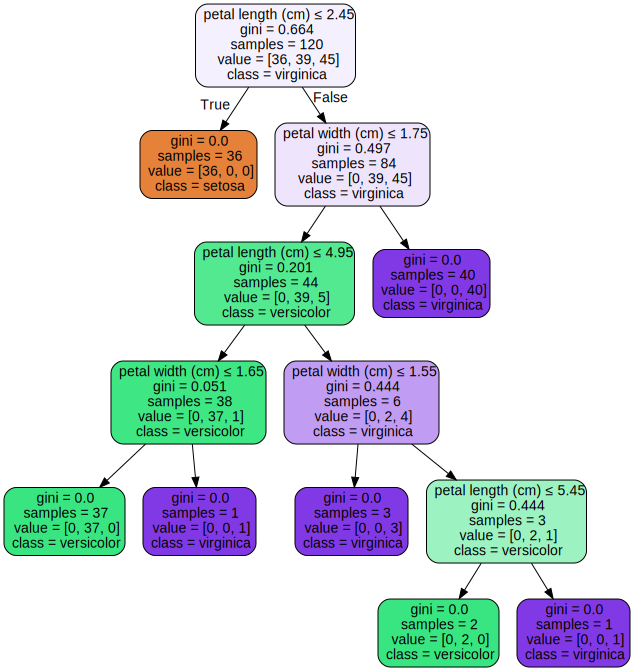

In [21]:
# save the tree visualization of the model in dot_data
dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris_dataset.feature_names,  
                         class_names=iris_dataset.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph